# Readings

1. Chapter 8 in the syllabus book 1 covers the materials in this notebook and related notebooks. As guidelines for your readings, you may want to: 
    - Study first the notebooks and then read the related topics in Chapter 8 and web links for more knowledge. Or
    - Read Chapter 8 to get broad vision and then study the notebooks and go through the web links when you need.
2. Try to practice the code in Chapter 8 book 1 GiHub. 
3. You do not need to memorize the code but you can use/modify it in your assignment and project. I will not explain the codes in details; rather, I will just go through its main concepts and the outputs.

# Copyright

## Copyright holder

Most of the contents of this lectures are taken/modified from the book:
"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow Concepts, Tools, and Techniques to
Build Intelligent Systems"-- [link](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646). Other contents are either developed by the instructor or taken from web links that are cited in the contexts.      

## The Course materials copyright

The Content is made available only for your personal, noncommercial educational, and scholarly use. You may not use the Content for any other purpose, or distribute, post or make the Content available to others unless you obtain any required permission from the copyright holder. Some Content may be provided via streaming or other means that restrict copying; you may not circumvent those restrictions. You may not alter or remove any copyright or other proprietary notices included in the Content. You need to take the permission from the above copyright holder to use the materials and to check the complete Course Materials Copyright section in the course canvas website, as well.

# The objectives
1. Priniciple Component Analysis (PCA).
2. Coveriance matrix.
3. Eigenvectors and eigenvalues.
4. The implementation of PCA steps,
5. PCA in scikit-learn

# [Dimenionality reduction][1]

1. Feature elimination: We reduce the feature space by eliminating features--(Feature selction methods)
2. Feature extraction: We create features from the data-- priniciple component analysis is one of them.

## Priniciple Component Analysis (PCA)

PCA is an unsupervised linear transformation technique. It combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! As an added benefit, each of the “new” variables after PCA are all independent of one another. 

## When should I use PCA?

1. To conduct feature extraction and explaratory analysis.
2. To reduce the number of predictors.
2. To ensure the predictors are independent of one another.
3. To be comfortable that they are less interpretable.

## The main PCA cocnept:

The orthogonal axes (principal components) of the new subspace can be interpreted as the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other, as illustrated in the following figure:

<img style="float:center" src="./PCA concept.png" alt="drawing" height="200" width="200"/>


## [PCA cores:][2]

[Math. background](https://medium.com/data-science-365/statistical-and-mathematical-concepts-behind-pca-a2cb25940cd4)

### 1. Coveriance matrix: 
- <b> Variance </b> is a measure of the variability or spread in a set of data: <br/> <br/>
<center>$\large \sigma^2_{x}=\frac{1}{n-1}\sum_{i}^{n}(x_{i}-\overline{x})^2$ </center> <br/>
- <b> Covariance </b> is a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction.<br/> <br/>
<center>$\large \sigma(x,y)=\frac{1}{n-1}\sum_{i}^{n}(x_{i}-\overline{x})(y_{i}-\overline{y})$ </center> 
    - <b> Covariance Matrix: </b>  
<center>$\large C_{i,j}=\sigma(x_{i},y_{j})$ where $C \in \mathbb{R}^{dxd}$ </center>

### 2. Eigenvectors and eigenvalues:
Eigenvectors are defined as those vectors whose directions remain unchanged after any linear transformation has been applied to them. However, their length could not remain the same after the transformation, i.e., the result of this transformation is the vector multiplied by a scalar. This scalar is called eigenvalue and each eigenvector has one associated to it. The number of eigenvectors or components that we can calculate for each data set is equal to the dimension of the data set. 
 
 ### [3. Extracting eigenvectors and eigenvalues][3]
 
 Given the the dataset $Z$ and the coveriance matrix $C=Z^{T}Z$, we use [Singular Value Decomposition(SVD)][4] to decompose $C$ into $PDP^{-1}$ where $P$ is the matrix of eigenvectors and $D$ is the diagonal matrix with eigenvalues on the diagonal and values of zero everywhere else. The eigenvalues on the diagonal of $D$ will be associated with the corresponding column in $P$ — that is, the first element of $D$ is λ₁ and the corresponding eigenvector is the first column of $P$. 

[1]:https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
[2]:https://www.neuraldesigner.com/blog/principal-components-analysis
[3]:https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
[4]:https://en.wikipedia.org/wiki/Singular_value_decomposition

# [PCA steps][1]



1. Preparing the dataset
 - Loading the dataset
 - Exploratory visualization
2. Standardizing the data
3. Eigendecomposition - computing eigenvectors and eigenvalues
  - Covariance Matrix
  - Singular Value Decomposition to obtain eigenvectors and eigenvalues
4. Selecting principal components
  - Sorting eigenpairs
  - Explained variance
5. Projection matrix
  - Projection onto the new feature space

[1]:https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

# [Example-- Let us practice][1]

<b> Name of features: </b> Class,Alcohol, Malic acid, Ash, Alcalinity of ash,  Magnesium, Total phenols, Flavanoids,  Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines,Proline. Let us [practice][2]

[1]:https://archive.ics.uci.edu/ml/machine-learning-databases/wine/
[2]:https://dev.to/nexttech/principal-component-analysis-for-dimensionality-reduction-57i1

## Load the data

In [1]:
import pandas as pd

df_wine = pd.read_csv('~/DATA/wine.csv',header=None)



## Splitting and standardize the data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Decompose  the convolution matrix into eigenvectors and eigenvalues

In [3]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vecs)
print(eigen_vals)

[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953989e-01 -1.10845657e-01
   1.99483410e-01]
 [-1.54365821e-01  2.89745182e-01  1.96135481e-01 -3.67511070e-01
   6.76487073e-01  6.57772614e-02 -4.05268966e-01  1.16617503e-01


## Calculate the variance explained ratios and plot them

The variance explained ratio of an eigenvalue λj is simply the fraction of an eigenvalue λj and the total sum of the eigenvalues: <br/>

<center> $\large \frac{\lambda_{j}}{\sum_{j}^{d}\lambda_{j}} $ </center>

We can see that the first two principal components combined explain almost 60% of the variance in the dataset.

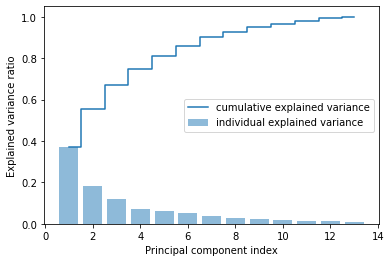

In [4]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

## Feature transformation

### Sort the eigenpairs by descending order of the eigenvalues

In [5]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(4.8427453156558915,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352246,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203518,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977352,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578422,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114

### Construct a projection matrix from the selected eigenvectors 

Using the two eigenvectors that correspond to the two largest eigenvalues, to capture about 60% of the variance in this dataset. 

In [6]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


### Data transformation

We can transform the entire 124 x 13-dimensional training dataset onto the two principal components by calculating the matrix dot product:



In [7]:
X_train_pca = X_train_std.dot(w)
X_train_pca

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

Visualize the transformed Wine training set, now stored as an 124 x 2-dimensional matrix, in a two-dimensional scatterplot:

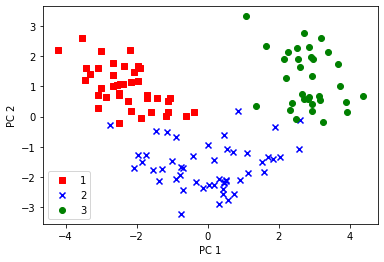

In [8]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# PCA in scikit-learn

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(solver='liblinear')

Visualize the decision regions on the training dataset

/tmp/ipykernel_589/1079956100.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


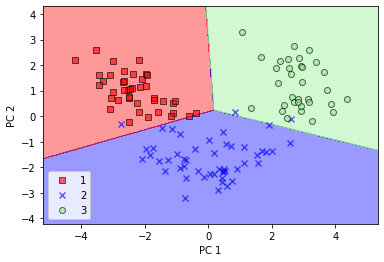

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Visualize the decision regions of test dataset

In [ ]:
# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

# Videos to watch

1. [Covariance matrix][1]
2. [Eigenvectors and Eigenvalues][2]
3. [PCA][3]


[1]:https://www.youtube.com/watch?v=0GzMcUy7ZI0
[2]:http://videos.mathtutordvd.com/detail/videos/linear-algebra---vol-2/video/nddzsJAT21g/15---what-are-eigenvalues-and-eigenvectors-learn-how-to-find-eigenvalues.?autoStart=true
[3]:https://www.youtube.com/watch?v=g-Hb26agBFg